# Imports and preparation

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
import matplotlib.animation
import IPython.display

from beam_splitter import *

In [2]:
# N = 1800
# x, dx = np.linspace(-25, 155, N, endpoint=False, retstep=True)
x, dx = np.linspace(-10,10,5000,endpoint=True, retstep=True)
# psi0 = gaussian_wavepacket(x, x0=0.0, sigma0=5.0, p0=10)
sigma = 0.5
m = 10000
p0 = 10
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=p0,sigma=sigma)

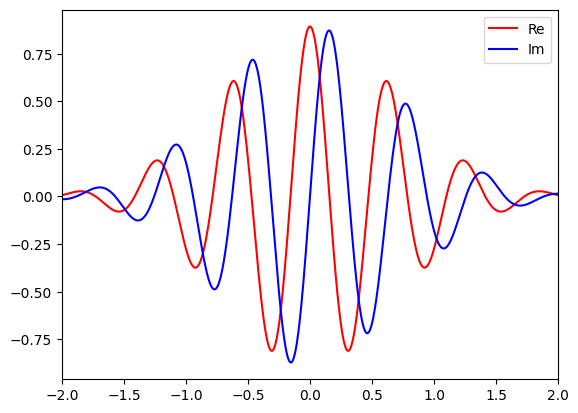

In [11]:
complex_plot(x,psi0)

# free particle

In [ ]:
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_free = evolution(psi0,m,V=0,dx=dx,steps=40000,dt=0.1,save_every=1000)
animate(x,sim_free)

# In a box

In [ ]:
box_potential = np.where((x>-2)&(x<2),0,1)
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_box_mom = evolution(psi0,m,V=box_potential,dx=dx,steps=100000,save_every=500)
animate(x,sim_box_mom,init_func=box_init,name='Box')

# Bouncing on a barrier

In [ ]:
barrier_weak_potential = np.where((x>1.4)&(x<1.6),3.5e-2,0)
psi0 = wave_packet(x,x0=0.0,dx=dx,mom=10,sigma=sigma)
sim_barrier_mom = evolution(psi0,m,V=barrier_weak_potential,dx=dx,steps=50000,save_every=500)
animate(x,sim_barrier_mom,init_func=barrier_init,name='barrier')

# In harmonic potential

In [ ]:
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_harmonic_potential = evolution(psi0,m,V=harmonic_potential,dx=dx,steps=40000,save_every=500)
animate(x,sim_harmonic_potential,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential)

In [ ]:
omega0 = 1/(2*m*sigma**2)
harmonic_potential = m*np.square(omega0*x)/2
psi0 = wave_packet(x,x0=0,dx=dx,mom=0,sigma=sigma)
sim_harmonic_potential = evolution(psi0,m,V=harmonic_potential,dx=dx,steps=40000,save_every=500)
animate(x,sim_harmonic_potential,init_func=harmonic_init,name='harmonic',V_sho=harmonic_potential)

In [6]:
T = 2*np.pi/omega0

31415.92653589793

# Beam splitter

In [19]:
135*p0/(m)

0.135

In [25]:
omega0 = 1/(2*m*sigma**2)
beam_splitter = m*np.square(omega0*x)/2
beam_splitter[2500] = 111.8*p0/(m)
beam_splitter[2499] = 111.8*p0/(m)
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=p0,sigma=sigma)
sim_beam_splitter = evolution(psi0,m,V=beam_splitter,dx=dx,steps=80000,save_every=500)
animate(x,sim_beam_splitter,init_func=beam_init,name='beam',V_sho=beam_splitter)
# norm 9999999999999892

MovieWriter Pillow unavailable; using Pillow instead.


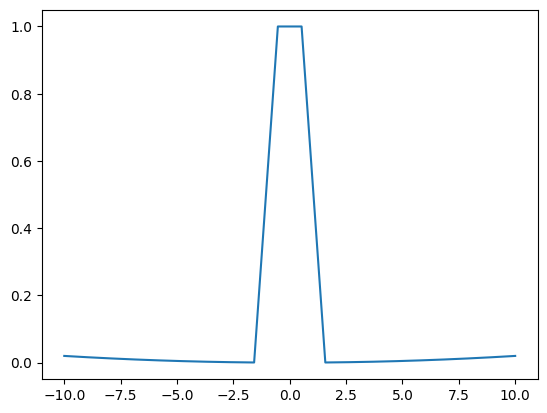

In [31]:
y, dy = np.linspace(-10,10,20,endpoint=True, retstep=True)
omega0 = 1/(2*m*sigma**2)
Vy = m*np.square(omega0*y)/2
Vy[10] += 1
Vy[9] += 1
plt.plot(y,Vy)

# Quantum Radar

In [5]:
omega0 = 1/(2*m*sigma**2)
radar = m*np.square(omega0*x)/2
radar[list(x).index(0)] = p0/m
# radar[list(x).index(5):] = 3
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_radar = evolution(psi0,m,V=radar,dx=dx,steps=400000,save_every=500)
animate(x,sim_radar,init_func=radar_init,name='beam',V_sho=radar)

MovieWriter Pillow unavailable; using Pillow instead.


In [14]:
radar = m*np.square(omega0*x)/2
radar[list(x).index(0)+1] = 1.25*p0/m
# radar[list(x).index(5):] = 3
psi0 = wave_packet(x,x0=-2.0,dx=dx,mom=10,sigma=sigma)
sim_radar1 = evolution(psi0,m,V=radar,dx=dx,steps=400000,save_every=500)

# QFI

In [15]:
qfi = QFI([sim_radar,sim_radar1], dx)

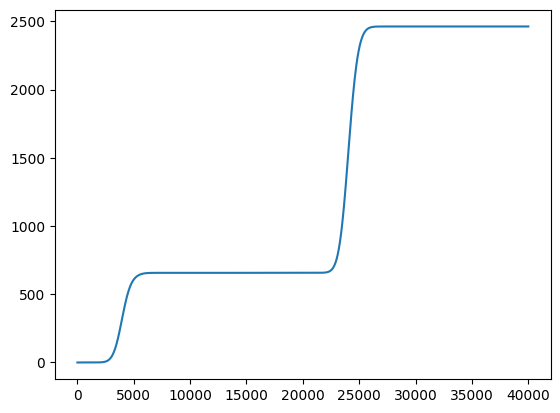

In [23]:
plt.plot(0.1*np.linspace(0,400000,len(qfi)),qfi)

In [62]:
# def two_plot(t,qfi,x,simulation_steps):
#     fig, (axl, axr) = plt.subplots(
#         ncols=2,
#         # sharey=True,
#         figsize=(12, 4),
#     )
#     # axl.set_aspect(2)
#     axl.set_box_aspect(1 / 1)
#     axr.set_box_aspect(1 / 3)
#     # axr.yaxis.set_visible(False)
#     # axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

#     # draw circle with initial point in left Axes
#     point, = axl.plot([], [], '-')
#     # point, = axl.plot(t[0], qfi[0], "o")
#     axl.set_xlim(0,t[-1])
#     axl.set_ylim(min(qfi),max(qfi))
#     prob = complex_plot(x,simulation_steps[0],ab=False)
#     axr.set_xlim(-10,10)
#     axr.set_ylim(-0.5,2)

#     def animate(frame):
#         prob.set_data((x, np.abs(simulation_steps[frame])))
#         point.set_data(t[:frame], qfi[:frame])
#         # con.xy1 = x, y
#         # con.xy2 = i, y
#         # return point, sine, con
#         return point, prob


#     anim = FuncAnimation(fig, animate, frames=int(len(simulation_steps)), interval=50)
#     anim.save('qfi.gif', writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


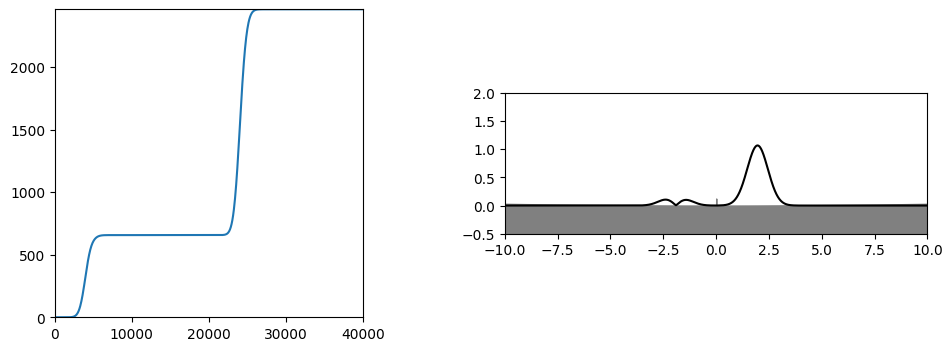

In [16]:
two_plot(0.1*np.linspace(0,400000,len(qfi)),qfi,x,sim_radar,radar)